In [1]:
import sys
sys.path.append("C:\\Users\\KlimovaAnnaA\\Documents\\MyFiles\\Projects\\Working_attributes")
from Imports import * 

In [2]:
# data = export_from_RISKCUSTOM('select table_name from ALL_TABLES')
# data = export_from_WHWEEK('select table_name from ALL_TABLES')

In [3]:
print_to_excel = True

In [4]:
string = 'API8, ICI4, API2, NEWC'
str_list = string.split(', ')
str_query = '|'.join(str_list)
str_query

'API8|ICI4|API2|NEWC'

In [5]:
table = 'XXMR_MADAB_COMMODITIES'
db = 'RISKACCESS'
years = 5
query = f"""
select distinct * from "{db}"."{table}"
fetch first 3 rows only
"""
data = export_from_RISKCUSTOM(query)
data.head(2)
data.columns

C:\Users\KlimovaAnnaA\Documents\MyFiles\Projects\Working_attributes\Defs.py:92: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data_export = pd.read_sql(query, con=connection)


Index(['ID', 'CODE', 'DESCRIPTION', 'PRODUCT_CATEGORY', 'PRODUCT_GROUP',
       'PRODUCT_BRIEF_NAME', 'PRODUCT_NAME', 'REGION',
       'COMMODITY_CODE_LOCATION', 'GEOPOINT', 'INDENTIFYING_ATTRIBUTE',
       'NON_INDENTIFYING_ATTRIBUTE', 'PRICE_SOURCE', 'INFO_SOURCE',
       'INCOTERMS', 'QUOTATION', 'UNIT', 'CURRENCY_1', 'CURRENCY_2',
       'MULTIPLIER', 'CALENDAR_1', 'CALENDAR_2', 'FORWARD_BY', 'VALID_FROM',
       'VALID_TO', 'UUID'],
      dtype='object')

In [6]:
data.FORWARD_BY.unique()
data

,ID,CODE,DESCRIPTION,PRODUCT_CATEGORY,PRODUCT_GROUP,PRODUCT_BRIEF_NAME,PRODUCT_NAME,REGION,COMMODITY_CODE_LOCATION,GEOPOINT,...,UNIT,CURRENCY_1,CURRENCY_2,MULTIPLIER,CALENDAR_1,CALENDAR_2,FORWARD_BY,VALID_FROM,VALID_TO,UUID
0,109,AS China,Market AS China FOB USD/mt A Spot Weekly,Fertilizer,Nitrogen Fertilizers,Ammonium Sulphate,AS,Asia&Pacific,China,n/a,...,mt,USD,None,None,None,None,S,1900-01-01,4000-01-01 00:00:00,AS China/Market/ICIS/FOB/A Spot Weekly/USD/mt/S
1,110,AS Europe,Market AS Europe FOB USD/mt A Spot Weekly,Fertilizer,Nitrogen Fertilizers,Ammonium Sulphate,AS,Europe,Europe,n/a,...,mt,USD,None,None,None,None,S,1900-01-01,4000-01-01 00:00:00,AS Europe/Market/ICIS/FOB/A Spot Weekly/USD/mt/S
2,111,AS G Brazil,Argus AS G Brazil CFR A Spot Weekly USD/mt,Fertilizer,Nitrogen Fertilizers,Ammonium Sulphate,AS G,Latin America,Brazil,n/a,...,mt,USD,None,None,None,None,S,1900-01-01,4000-01-01 00:00:00,AS G Brazil/Argus/Argus/CFR/A Spot Weekly/USD/...


In [7]:
table = 'XXMR_MADAB_COMMODITIES'
db = 'RISKACCESS'
years = 5
query = f"""
select distinct ID, DESCRIPTION, QUOTATION, FORWARD_BY from "{db}"."{table}"

where QUOTATION = 'A' 
and (regexp_like(DESCRIPTION,'{str_query}') 
or regexp_like(CODE,'{str_query}')
or regexp_like(PRODUCT_NAME,'{str_query}') 
or regexp_like(UUID,'{str_query}')) 
and FORWARD_BY = 'D7MON'



--and VALID_FROM >= ADD_MONTHS(SYSDATE, -{12*years})
--fetch first 3 rows only
"""
data = export_from_RISKCUSTOM(query)

C:\Users\KlimovaAnnaA\Documents\MyFiles\Projects\Working_attributes\Defs.py:92: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data_export = pd.read_sql(query, con=connection)


In [8]:
data

,ID,DESCRIPTION,QUOTATION,FORWARD_BY
0,16285,GC NEWC Australia Newcastle D7MON index FOB US...,A,D7MON
1,10231,API2 ARA D7MON index CFR A USD mt Argus,A,D7MON
2,10241,API8 China South D7MON index CFR A USD mt Argus,A,D7MON
3,10288,ICI4 Indonesia D7MON index FOB A USD mt Argus,A,D7MON


In [9]:
# dict of id to product name
coal_dict = {}
for coal in str_list:
    id_list = data.loc[data.DESCRIPTION.str.contains(coal), 'ID'].values.tolist()
    id_dict = {y:x for x,y in zip([coal for i in range(len(id_list))],id_list)}
    coal_dict.update(id_dict)
# list of ids to sql query
id_list = data['ID'].values.tolist()
sql_id_list = str(id_list)[1:-1]
assert len(id_list) == len(coal_dict.keys())
assert len(id_list) == data.shape[0]
id_list

[16285, 10231, 10241, 10288]

In [10]:
table = 'XXMR_MADAB_CONTENT'
db = 'RISKACCESS'
years = 5
query = f"""
select * from "{db}"."{table}"

where COMMODITY_ID in ({sql_id_list})
--or regexp_like(CODE,'{str_query}')
--or regexp_like(PRODUCT_NAME,'{str_query}') 
--or regexp_like(UUID,'{str_query}') 

and PERIOD >= ADD_MONTHS(SYSDATE, -{12*years})
--fetch first 3 rows only
"""
data_export = export_from_RISKCUSTOM(query)
data_export.head()

C:\Users\KlimovaAnnaA\Documents\MyFiles\Projects\Working_attributes\Defs.py:92: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data_export = pd.read_sql(query, con=connection)


,ID,INSERTED_AT,COMMODITY_ID,NAME,VALUE_QUALIFIER,PUBLICATION_DATE,PERIOD_FROM,PERIOD_TO,PERIOD,PROPOGATE_ID,ENTITY,VALUE1,VALUE2,SOURCE_ID,STATUS,PERMISSION,APPROVED_BY,APPROVED_AT
0,None,2023-03-25 08:23:49,10231,average,average,2022-04-08,2022-04-04,2022-04-10,2022-04-04,1299491735,0,305.6,None,14703,P,None,None,None
1,None,2023-03-25 08:23:49,10231,average,average,2022-04-08,NaT,NaT,2022-04-05,1299491735,0,305.6,None,14703,P,None,None,None
2,None,2023-03-25 08:23:49,10231,average,average,2022-04-08,NaT,NaT,2022-04-06,1299491735,0,305.6,None,14703,P,None,None,None
3,None,2023-03-25 08:23:49,10231,average,average,2022-04-08,NaT,NaT,2022-04-07,1299491735,0,305.6,None,14703,P,None,None,None
4,None,2023-03-25 08:23:49,10231,average,average,2022-04-08,NaT,NaT,2022-04-08,1299491735,0,305.6,None,14703,P,None,None,None


In [11]:
data_export.shape
# data_export[data_export.VALUE1.isna()]
# data_export[data_export.duplicated()]

(3731, 18)

In [12]:
data_export['Coal'] = data_export['COMMODITY_ID'].replace(coal_dict)
data_export.Coal.unique()
data_export = data_export.sort_values(['Coal', 'PERIOD'])

data_export['rolling_mean'] = data_export.groupby('Coal')['VALUE1'].transform(lambda x: x.rolling(2*7, min_periods=1).mean())

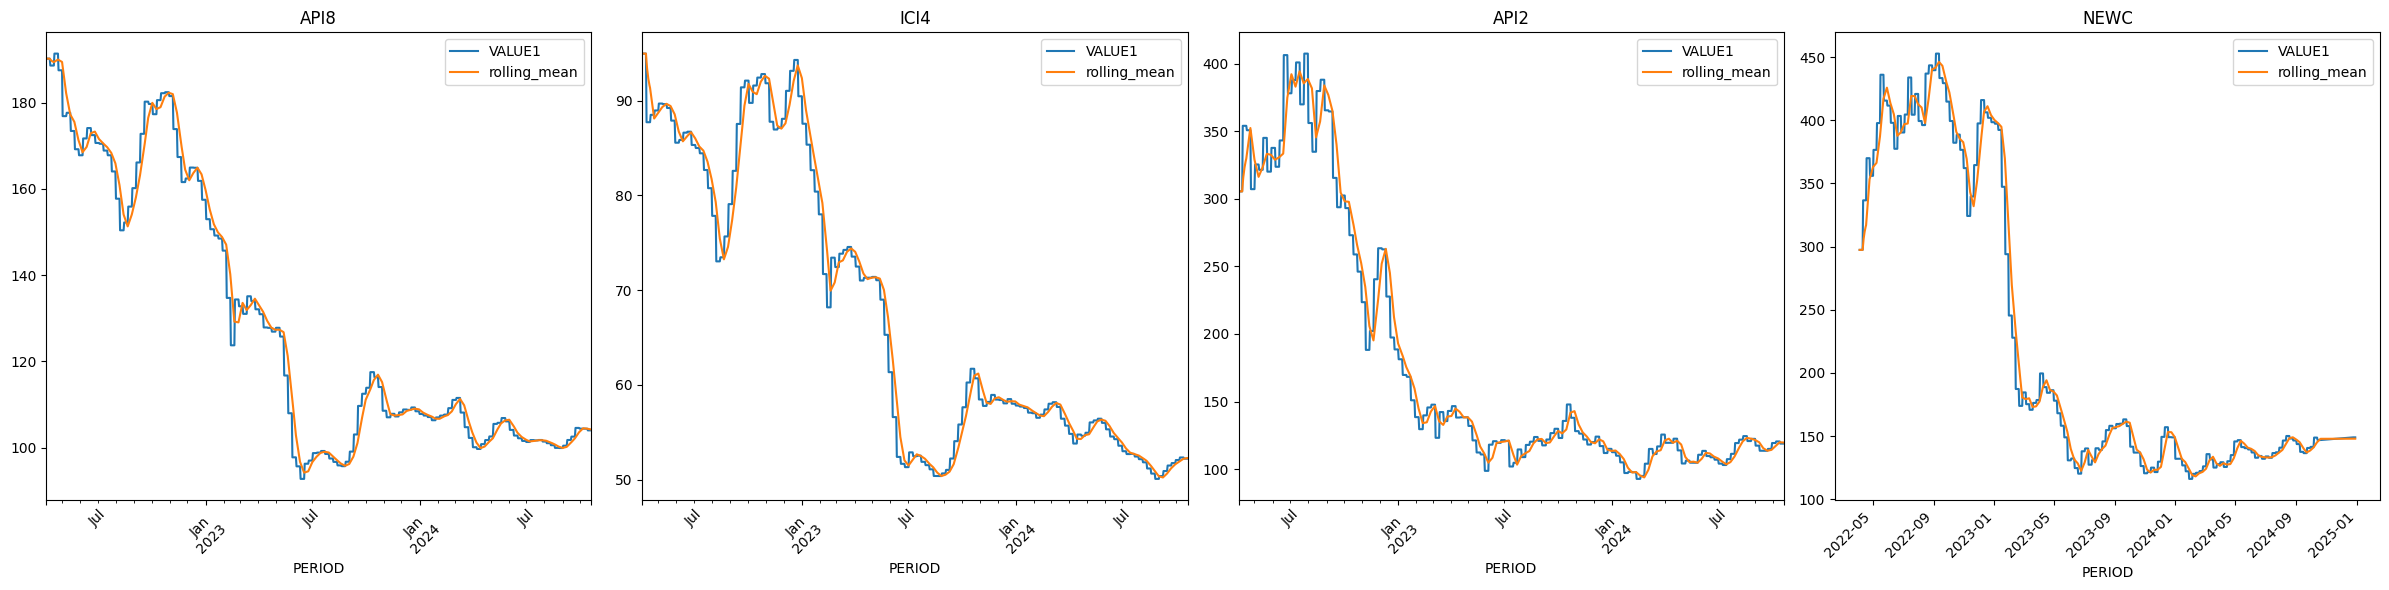

In [13]:
# data_plt = data.head(20)
fig, axes = plt.subplots(ncols=len(str_list), figsize=(24,6))
counter = 0
for coal in str_list:
    data_coal = data_export[data_export.Coal == coal]
    data_coal.plot(x='PERIOD', y=['VALUE1','rolling_mean'], ax=axes[counter], rot=45)
    # g = sns.lineplot(data_coal, x='PERIOD', y=['VALUE1','rolling_mean'], ax=axes[counter])
    axes[counter].set_title(coal)
    counter+=1
    # g.set_xticklabels(g.get_xticklabels(), rotation=30)
plt.tight_layout()
plt.savefig('all_lines_on.png')
# plt.show()

In [14]:
data_coal_corr = data_export.pivot_table(dropna=False, index='PERIOD', columns='Coal', values='VALUE1', aggfunc='sum').reset_index().sort_values('PERIOD')

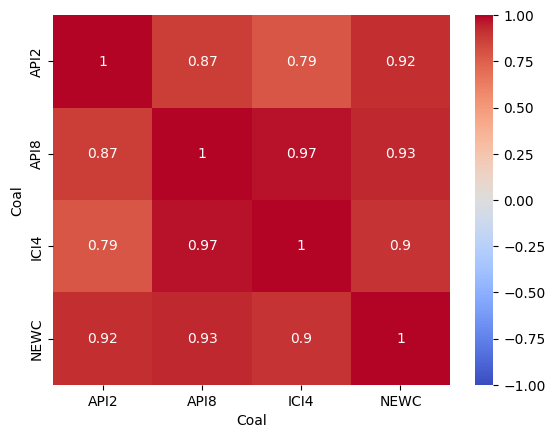

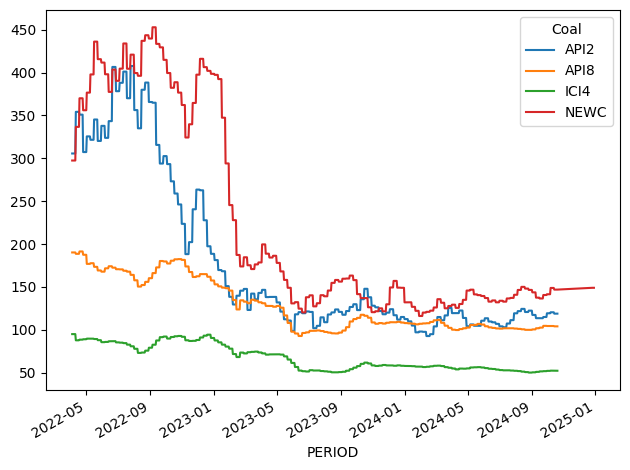

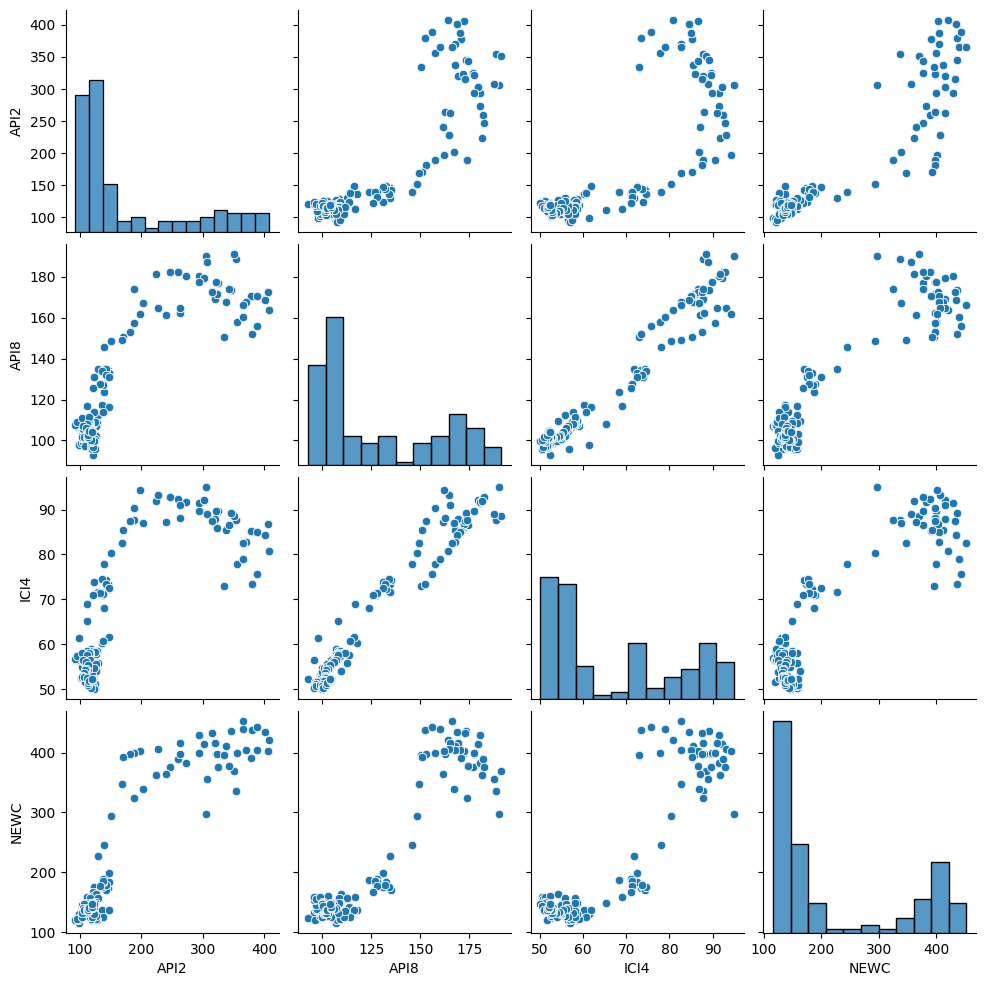

In [15]:
# choose data
data_plots = data_coal_corr[['PERIOD',	'API2',	'API8',	'ICI4',	'NEWC']]
# corr graph
sns.heatmap(data_plots.iloc[:,1:].corr(), annot=True, vmin=-1, vmax=1, cmap='coolwarm')
plt.savefig('corr_all.png')
# line graph
data_plots.plot(y = data_plots.columns[1:].tolist(), x='PERIOD')
plt.tight_layout()
plt.savefig('line_all.png')
# pair plot
sns.pairplot(data_plots)
plt.savefig('pair_all.png')
# sns.scatterplot()

In [16]:
# вынести обозначение периодов
# year
data_coal_corr['year'] = data_coal_corr.PERIOD.dt.year

In [17]:
asser 2==1

SyntaxError: invalid syntax (703989378.py, line 1)

In [19]:
data_coal_corr['year'].unique().tolist()

[2022, 2023, 2024]

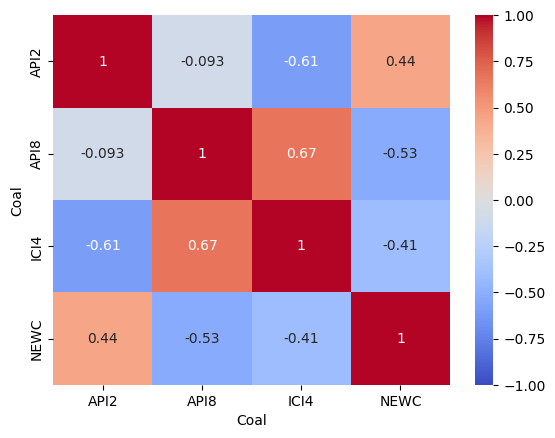

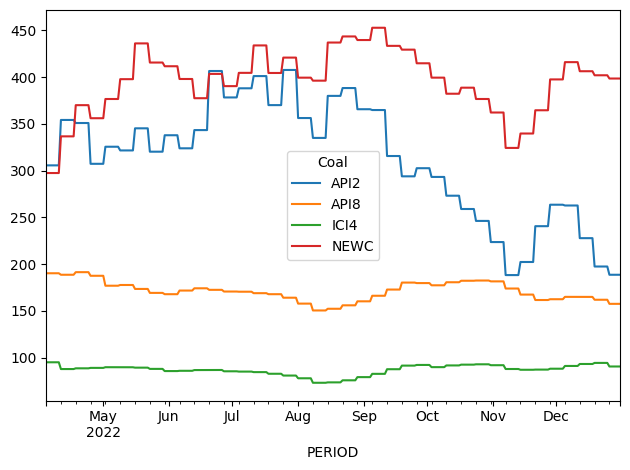

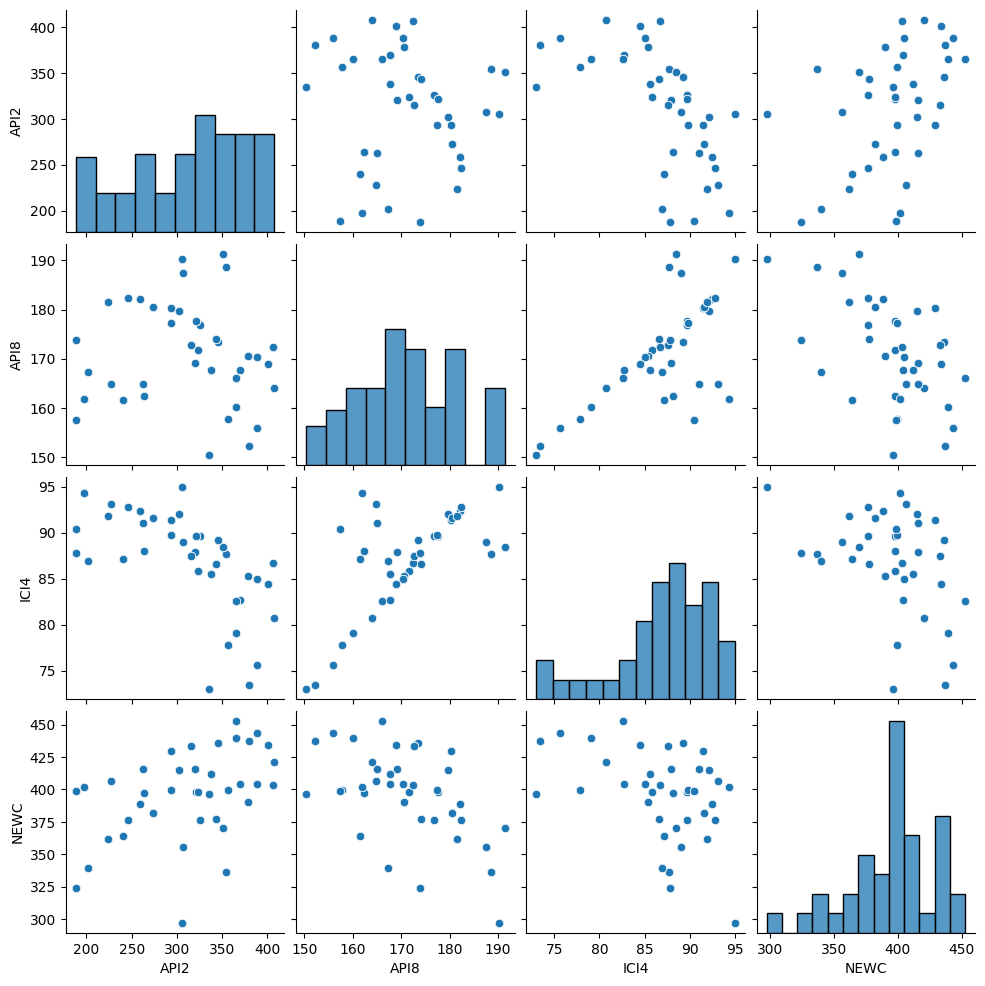

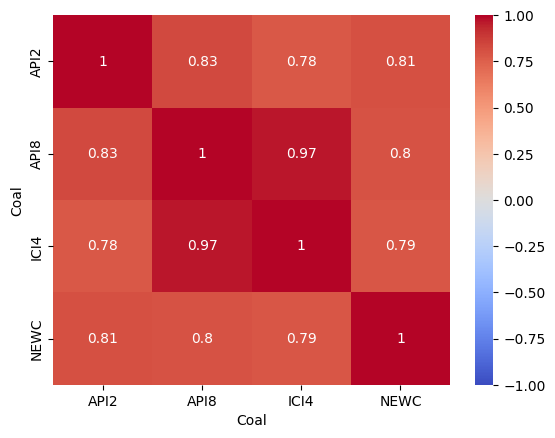

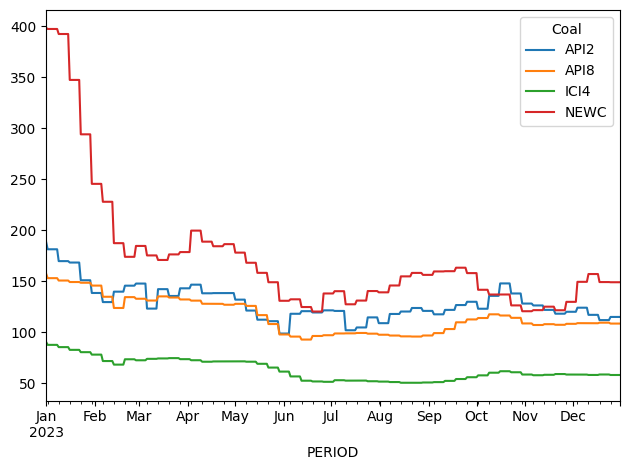

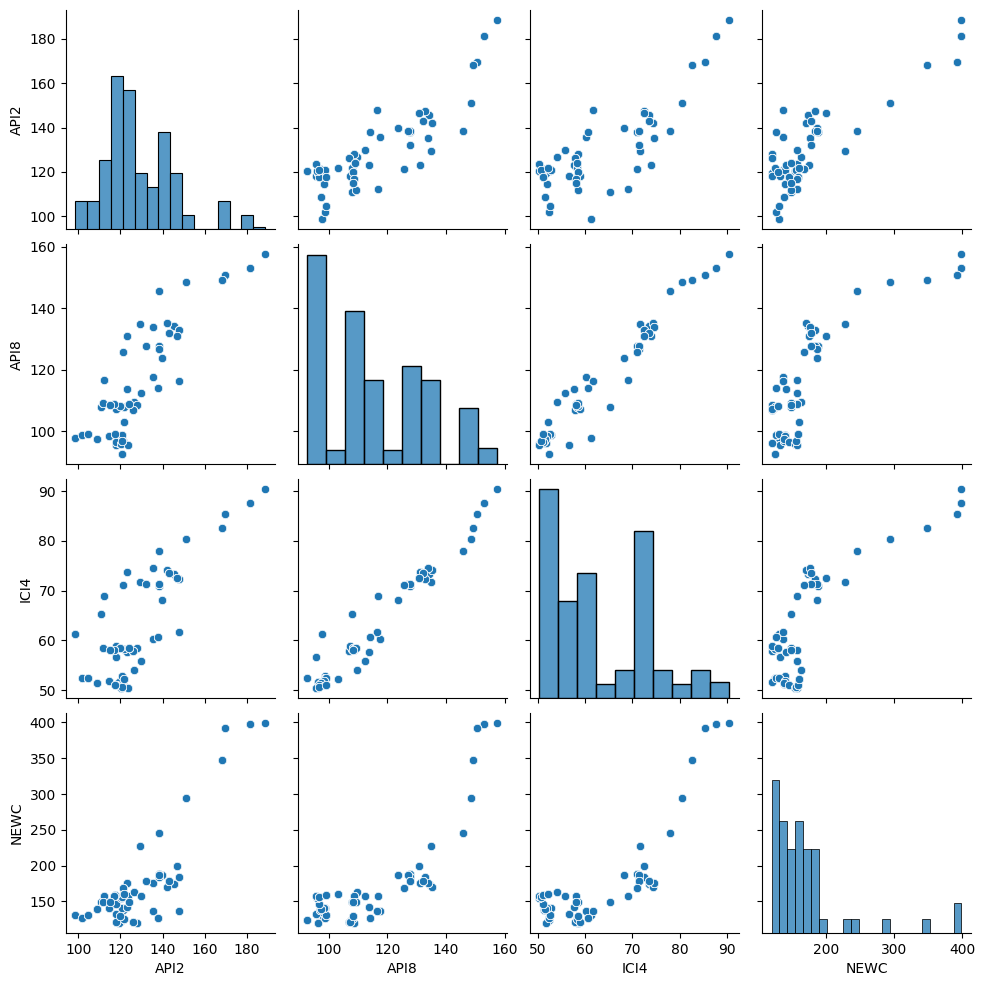

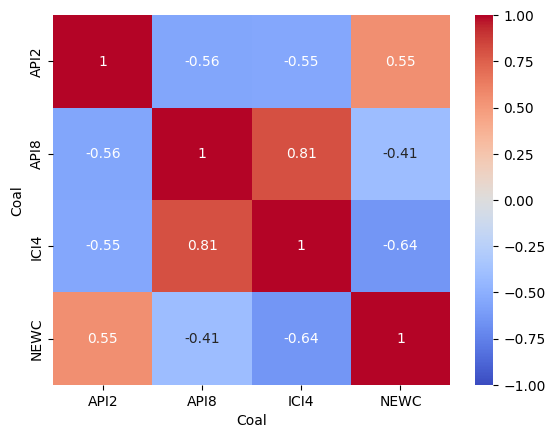

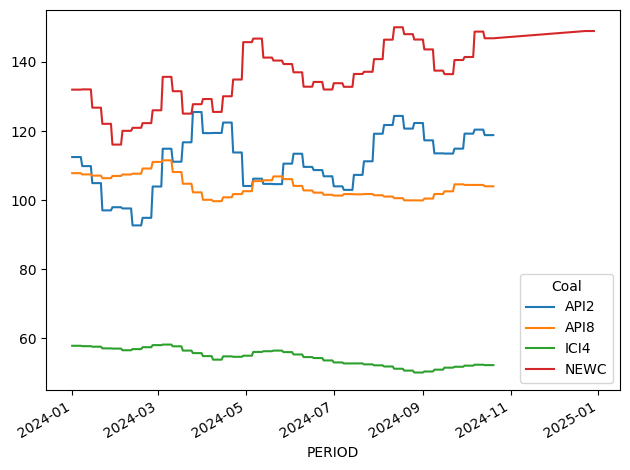

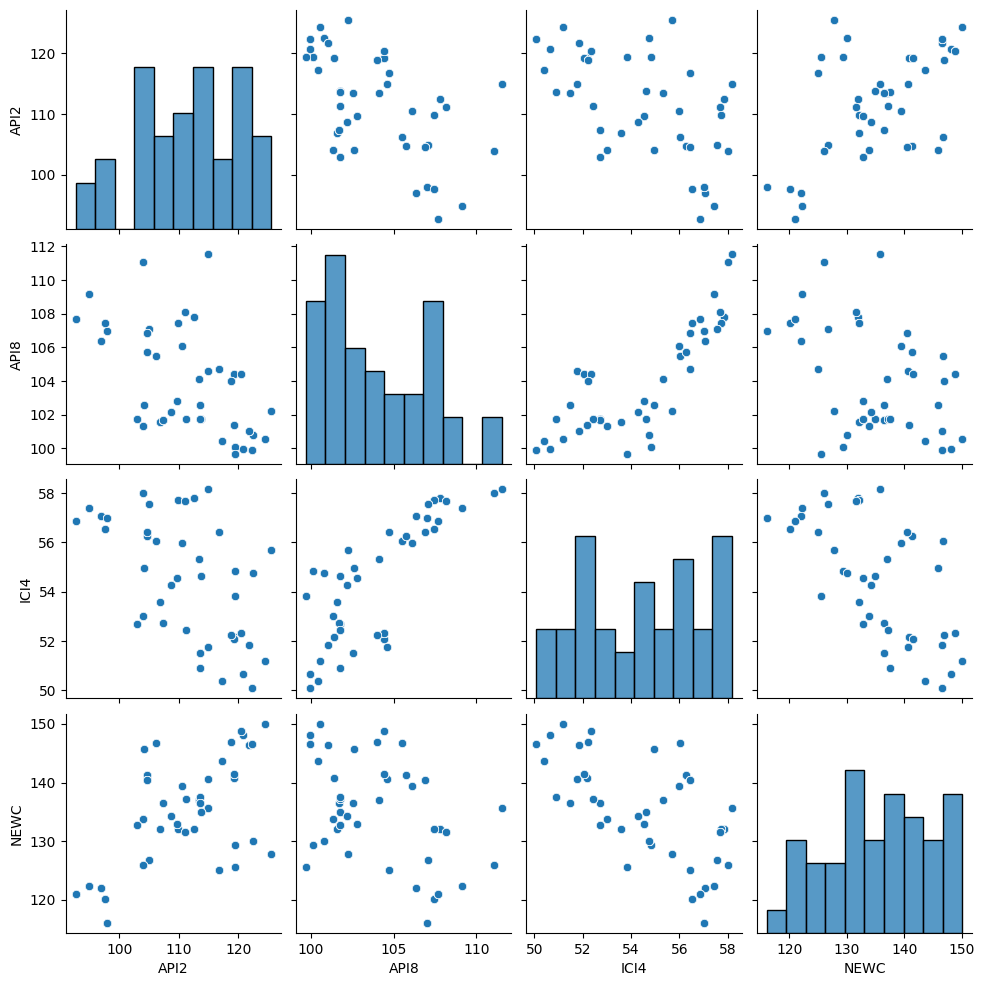

In [25]:
for yr in data_coal_corr['year'].unique().tolist():
    # choose data
    data_plots_year = data_coal_corr.loc[data_coal_corr.year==yr, ['PERIOD','API2','API8','ICI4','NEWC']]
    name_sheet = f'{yr}_year'
    # corr graph
    sns.heatmap(data_plots_year.iloc[:,1:].corr(), annot=True, vmin=-1, vmax=1, cmap='coolwarm')
    name_pic = f'corr_{yr}.png'
    plt.savefig(name_pic)
    plt.show()
    # line graph
    data_plots_year.plot(y = data_plots_year.columns[1:].tolist(), x='PERIOD')
    plt.tight_layout()
    name_pic = f'line_{yr}.png'
    plt.savefig(name_pic)
    plt.show()
    # pair plot
    sns.pairplot(data_plots_year)
    name_pic = f'pair_{yr}.png'
    plt.savefig(name_pic)
    plt.show()

In [28]:
picture_dict = {'all_lines_on.png':'H2', 'corr_all.png':'H35', 'line_all.png':'H61', 'pair_all.png':'H88'}


if print_to_excel == True:
    Output_file = f'{str(date.today())}_corr_coal.xlsx'
    with pd.ExcelWriter(Output_file, engine='openpyxl') as writer:

        # sql query
        pd.DataFrame({'SQL_query':query}, index=[1]).to_excel(writer, index=False, sheet_name='SQL_query')

        # all data
        data_coal_corr.to_excel(writer, index=False, sheet_name='all_data')
        worksheet = writer.sheets['all_data']
        for picture in list(picture_dict.keys()):
            img = openpyxl.drawing.image.Image(picture)
            img.anchor = picture_dict[picture]
            worksheet.add_image(img)

        # data by years
        for yr in data_coal_corr['year'].unique().tolist():
            # choose data
            data_plots_year = data_coal_corr.loc[data_coal_corr.year==yr, ['PERIOD','API2','API8','ICI4','NEWC']]
            name_sheet = f'{yr}_year'
            data_plots_year.to_excel(writer, index=False, sheet_name=name_sheet)
            worksheet = writer.sheets[name_sheet]

            picture_dict_year = {f'corr_{yr}.png':'H2', f'line_{yr}.png':'H35', f'pair_{yr}.png':'H61'}
            for name_pic in list(picture_dict_year.keys()):
                img = openpyxl.drawing.image.Image(name_pic)
                img.anchor = picture_dict_year[name_pic]
                worksheet.add_image(img)


Срочная задача:

In [3]:
table = 'XXMR_MADAB_COMMODITIES'
db = 'RISKACCESS'
years = 5
query = f"""
select * from "{db}"."{table}"
where INCOTERMS = 'CFR'
and INFO_SOURCE in ('Argus', 'Fertecon', 'ICIS', 'CRU', 'Profercy')
and COMMODITY_CODE_LOCATION = 'Brazil'
and FORWARD_BY = 'S'
-- and QUOTATION = 'A'
-- and FORWARD_BY = 'D7MON'
-- fetch first 500 rows only
"""
data = export_from_RISKCUSTOM(query)
data.head(2)

C:\Users\KlimovaAnnaA\Documents\MyFiles\Projects\Working_attributes\Defs.py:92: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data_export = pd.read_sql(query, con=connection)


,ID,CODE,DESCRIPTION,PRODUCT_CATEGORY,PRODUCT_GROUP,PRODUCT_BRIEF_NAME,PRODUCT_NAME,REGION,COMMODITY_CODE_LOCATION,GEOPOINT,...,UNIT,CURRENCY_1,CURRENCY_2,MULTIPLIER,CALENDAR_1,CALENDAR_2,FORWARD_BY,VALID_FROM,VALID_TO,UUID
0,111,AS G Brazil,Argus AS G Brazil CFR A Spot Weekly USD/mt,Fertilizer,Nitrogen Fertilizers,Ammonium Sulphate,AS G,Latin America,Brazil,n/a,...,mt,USD,None,None,None,None,S,1900-01-01,4000-01-01 00:00:00,AS G Brazil/Argus/Argus/CFR/A Spot Weekly/USD/...
1,112,AS G Brazil,Market AS G Brazil CFR USD/mt A Spot Weekly,Fertilizer,Nitrogen Fertilizers,Ammonium Sulphate,AS G,Latin America,Brazil,n/a,...,mt,USD,None,None,None,None,S,1900-01-01,4000-01-01 00:00:00,AS G Brazil/Market/ICIS/CFR/A Spot Weekly/USD/...


In [4]:
products_list = ['AN','AS','CAN','MAP','MOP','SSP','TSP','UREA','NK','NPK']
products_list_lower = [x.lower() for x in products_list]
PRODUCT_NAME_list = data.PRODUCT_NAME.unique().tolist()

end_dict = {}
for product in products_list_lower:
    mini_list = [x for x in PRODUCT_NAME_list if product in x.lower()]
    for mini_pr in mini_list:
        end_dict[mini_pr] = product.upper()
end_dict

{'AN': 'AN',
 'AN 34/SAN 33.03': 'AN',
 'AS G': 'AS',
 'AS capro': 'AS',
 'AS': 'AS',
 'AS G/compacted': 'AS',
 'MAP 10:50': 'MAP',
 'MAP 11:44': 'MAP',
 'MAP 11:52': 'MAP',
 'MAP 12:52': 'MAP',
 'MOP G': 'MOP',
 'SSP 19-21': 'SSP',
 'SSP 18': 'SSP',
 'SSP 18-21': 'SSP',
 'SSP 18-20': 'SSP',
 'TSP': 'TSP',
 'TSP G': 'TSP',
 'Urea G': 'UREA',
 'Urea P': 'UREA'}

In [5]:
data['Product'] = data.PRODUCT_NAME.replace(end_dict)
data_part = data[data.Product.isin(products_list)]
data_part.head(2)

,ID,CODE,DESCRIPTION,PRODUCT_CATEGORY,PRODUCT_GROUP,PRODUCT_BRIEF_NAME,PRODUCT_NAME,REGION,COMMODITY_CODE_LOCATION,GEOPOINT,...,CURRENCY_1,CURRENCY_2,MULTIPLIER,CALENDAR_1,CALENDAR_2,FORWARD_BY,VALID_FROM,VALID_TO,UUID,Product
0,111,AS G Brazil,Argus AS G Brazil CFR A Spot Weekly USD/mt,Fertilizer,Nitrogen Fertilizers,Ammonium Sulphate,AS G,Latin America,Brazil,n/a,...,USD,None,None,None,None,S,1900-01-01,4000-01-01 00:00:00,AS G Brazil/Argus/Argus/CFR/A Spot Weekly/USD/...,AS
1,112,AS G Brazil,Market AS G Brazil CFR USD/mt A Spot Weekly,Fertilizer,Nitrogen Fertilizers,Ammonium Sulphate,AS G,Latin America,Brazil,n/a,...,USD,None,None,None,None,S,1900-01-01,4000-01-01 00:00:00,AS G Brazil/Market/ICIS/CFR/A Spot Weekly/USD/...,AS


In [8]:
data_part['alive'] = 'yes'
Id_list_del = [111,447,856,1219,1224,1373,1572,1574,1815]
data_part.loc[data_part.ID.isin(Id_list_del), 'alive'] = 'no'

C:\Users\KlimovaAnnaA\AppData\Local\Temp\ipykernel_16068\1746894636.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_part['alive'] = 'yes'


In [9]:
with pd.ExcelWriter(f'{str(date.today())}_Brazil_products.xlsx', engine='openpyxl') as writer:
    pd.DataFrame({'SQL_query':query}, index=[1]).to_excel(writer, index=False, sheet_name='SQL')
    data_part.to_excel(writer, index=False, sheet_name='data')

In [10]:
ID_dict = {x:y for x, y in zip(data_part.ID,data_part.Product)}
ID_list = data_part.ID.tolist()

In [11]:
ID_list_str = str(ID_list)[1:-1]

In [12]:
table = 'XXMR_MADAB_CONTENT'
db = 'RISKACCESS'
years = 10
query = f"""
select * from "{db}"."{table}"

where COMMODITY_ID in ({ID_list_str})

and PERIOD >= ADD_MONTHS(SYSDATE, -{12*years})
--fetch first 3 rows only
"""
data_export = export_from_RISKCUSTOM(query)
data_export.head()


C:\Users\KlimovaAnnaA\Documents\MyFiles\Projects\Working_attributes\Defs.py:92: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data_export = pd.read_sql(query, con=connection)


,ID,INSERTED_AT,COMMODITY_ID,NAME,VALUE_QUALIFIER,PUBLICATION_DATE,PERIOD_FROM,PERIOD_TO,PERIOD,PROPOGATE_ID,ENTITY,VALUE1,VALUE2,SOURCE_ID,STATUS,PERMISSION,APPROVED_BY,APPROVED_AT
0,None,2023-03-24 23:44:27,3,average,average,2015-12-31,2015-12-31,2016-01-14,2015-12-31,1294943429,0,217.5,None,6486,P,None,None,None
1,None,2023-03-24 23:44:27,3,average,average,2015-12-31,NaT,NaT,2016-01-01,1294943429,0,217.5,None,6486,P,None,None,None
2,None,2023-03-24 23:44:27,3,average,average,2015-12-31,NaT,NaT,2016-01-02,1294943429,0,217.5,None,6486,P,None,None,None
3,None,2023-03-24 23:44:27,3,average,average,2015-12-31,NaT,NaT,2016-01-03,1294943429,0,217.5,None,6486,P,None,None,None
4,None,2023-03-24 23:44:27,3,average,average,2015-12-31,NaT,NaT,2016-01-04,1294943429,0,217.5,None,6486,P,None,None,None


In [13]:
data_export['Product'] = data_export.COMMODITY_ID.replace(ID_dict)

In [14]:
last_id_list = [1816,1867,1868,1892,1893,1894,1898,1980,2385,2387,2783,7112,22189]

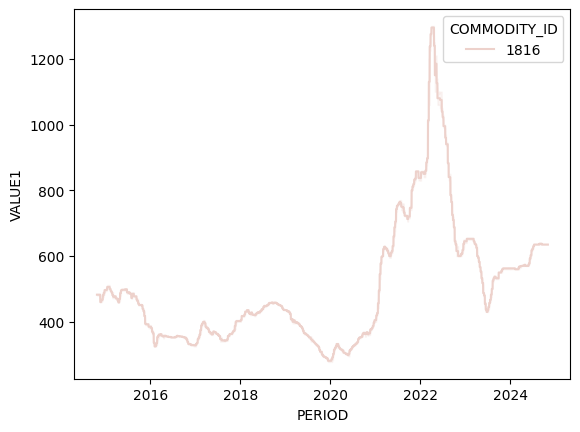

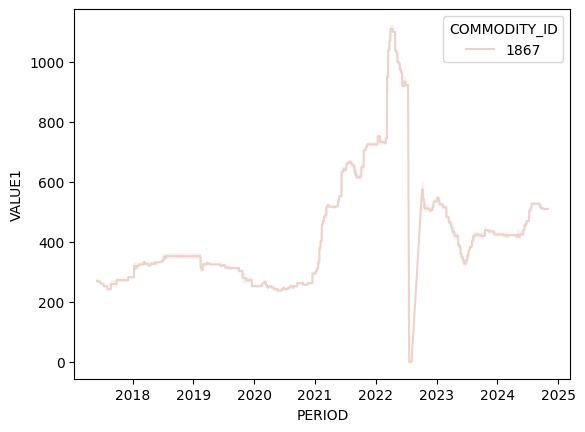

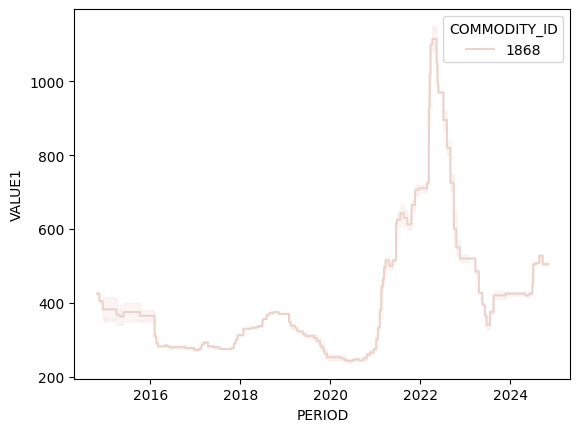

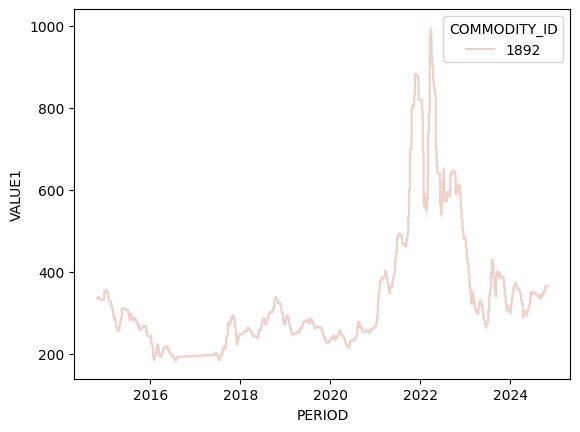

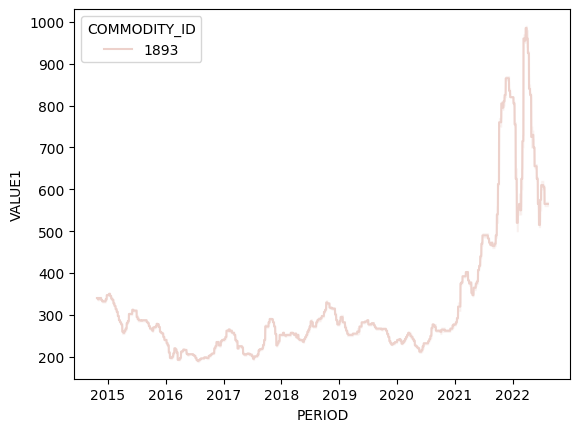

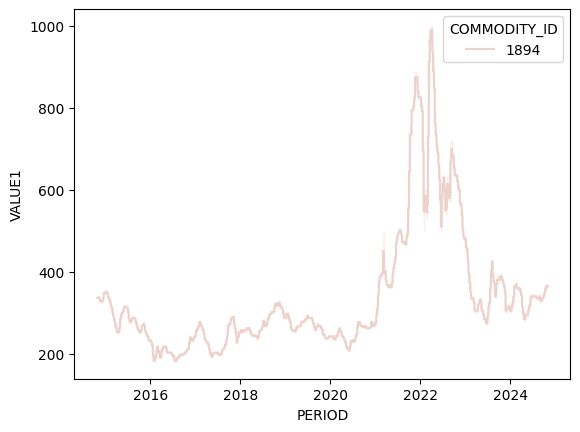

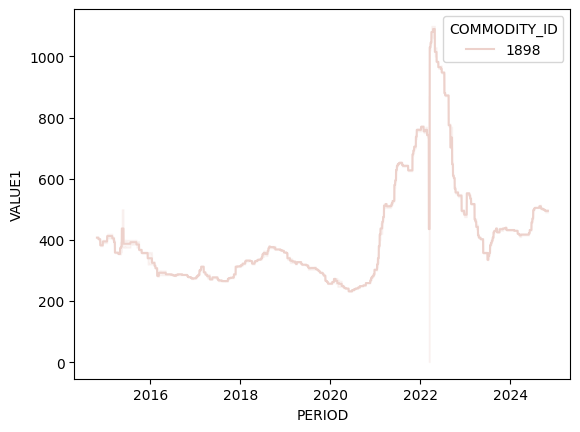

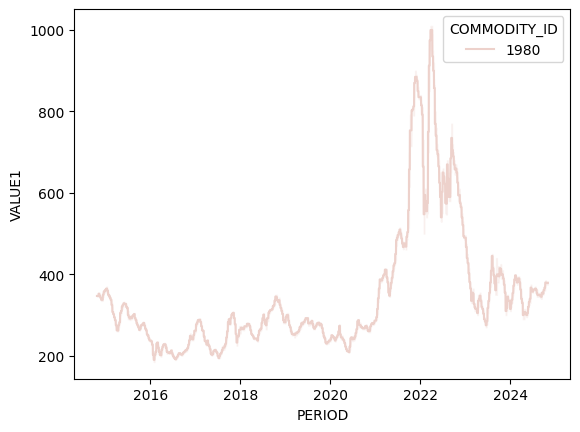

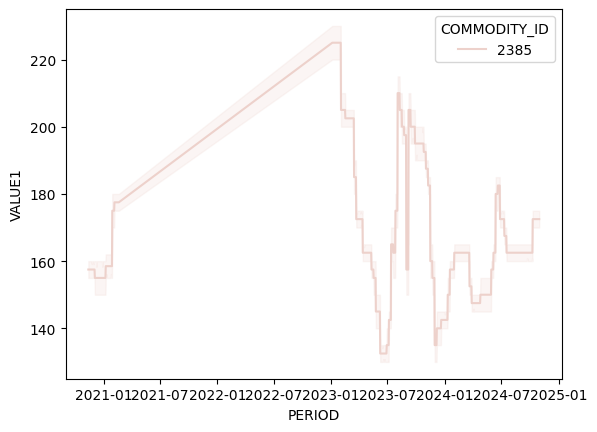

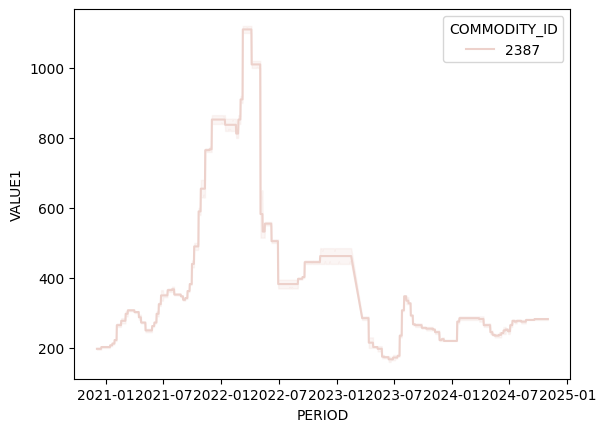

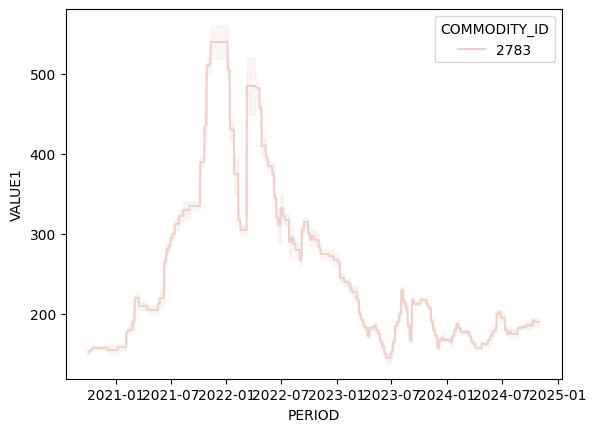

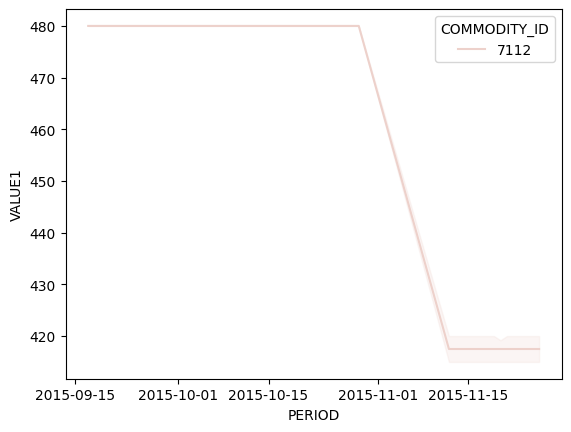

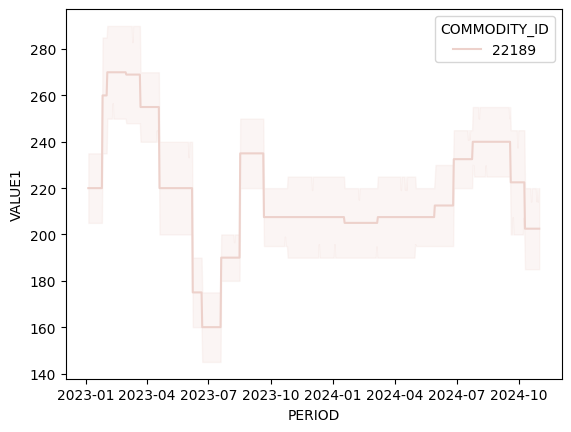

In [18]:
data_g = data_export.loc[data_export.COMMODITY_ID.isin(last_id_list), ['COMMODITY_ID','PERIOD','VALUE1']]
for id_g in data_g.COMMODITY_ID.unique():
    data_G_ID = data_g[data_g.COMMODITY_ID==id_g]
    sns.lineplot(data_G_ID, x='PERIOD', y='VALUE1', hue='COMMODITY_ID')
    plt.savefig(f'id_{id_g}.png')
    plt.show()